In [94]:
from SkiModel import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp, simpson
#import pymoo
import random

from Ski_Optimization_Simplified import *

Example Code for running 1 round of ski modeling to get efficiency and sensitivity measures

-1.0
565.7541277692154
100.0
efficiency 456032.49966831517
R_con 17.269941774574743
Knee Torque 53.99302351773477


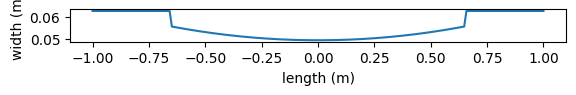

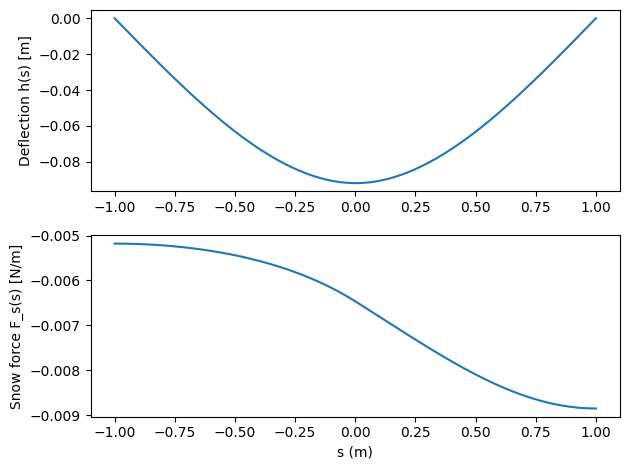

In [41]:
L = 2.0 #m, length of ski
w = 0.099 #m, waist width
w_max = .125 #m, max width
r_sc = 17.3 #m, sidecut radius
l_sc = 1.31 #length of sidecut
t_ski = .005 #thickness of ski


#trial run of full code
input_vector = [L,w,w_max, r_sc, l_sc, t_ski] #input optimize vector in this form

#visualize the ski 
s_vis = np.linspace(-2.0/2, 2.0/2, 200)
print(s_vis[0])
widths = get_widths(s_vis, L, w, w_max, r_sc, l_sc)
plot_ski(s_vis,widths)


#get the efficiency & sensitivity (it's a little sketch but at least it gives different numbers)
s,h, Fs, R_con, tau_knee, eff = ski_turn_iterative(input_vector, v_ski = 10) #can set weight and person length too if needed, current defaults: W_person=70, l_person=1.0
#print(f"Ft = {Ft:.2f} N,  Efficiency = {eff:.4f},  Sensitivity = {sens:.4e}")
print("efficiency", eff)
print("R_con", R_con)
print("Knee Torque", tau_knee)
#print(Fs)
plt.figure()
plt.subplot(2,1,1)
plt.plot(s, h); plt.ylabel("Deflection h(s) [m]")
plt.subplot(2,1,2)
plt.plot(s, Fs); plt.ylabel("Snow force F_s(s) [N/m]")
plt.xlabel("s (m)")
plt.tight_layout(); plt.show()

371.65361570587515
100.0
650.1981053199943
100.0
327.05799849981116
100.0
582.2987431890851
100.0
355.0802460602164
100.0
594.0012640765146
100.0
389.5547210302007
100.0
385.56731673754996
100.0
344.3877820053477
100.0
489.32706061958925
100.0
299.21944681955904
100.0
320.9391465104231
100.0
334.71809174282055
100.0
468.37349703608004
100.0
603.5537663431928
100.0
529.4199835591555
100.0
792.1571459788522
100.0
403.54209075472977
100.0
730.9050358902857
100.0
317.63020340200967
100.0
408.8546721840611
100.0
369.4766130010446
100.0
361.8128681082682
100.0
556.1216111408391
100.0
545.0244375106893
100.0
660.4125569129022
100.0
352.7215391747471
100.0
482.13961141501375
100.0
315.38729440789365
100.0
515.3184276736404
100.0
626.941565886882
100.0
317.91706772665117
100.0
427.4790820259848
100.0
403.6089273031188
100.0
370.16581412128187
100.0
422.39153712916925
100.0
376.4204951301895
100.0
459.6819664779728
100.0
415.85104636702613
100.0
660.4696534602263
100.0
720.3968318358396
100.0
62

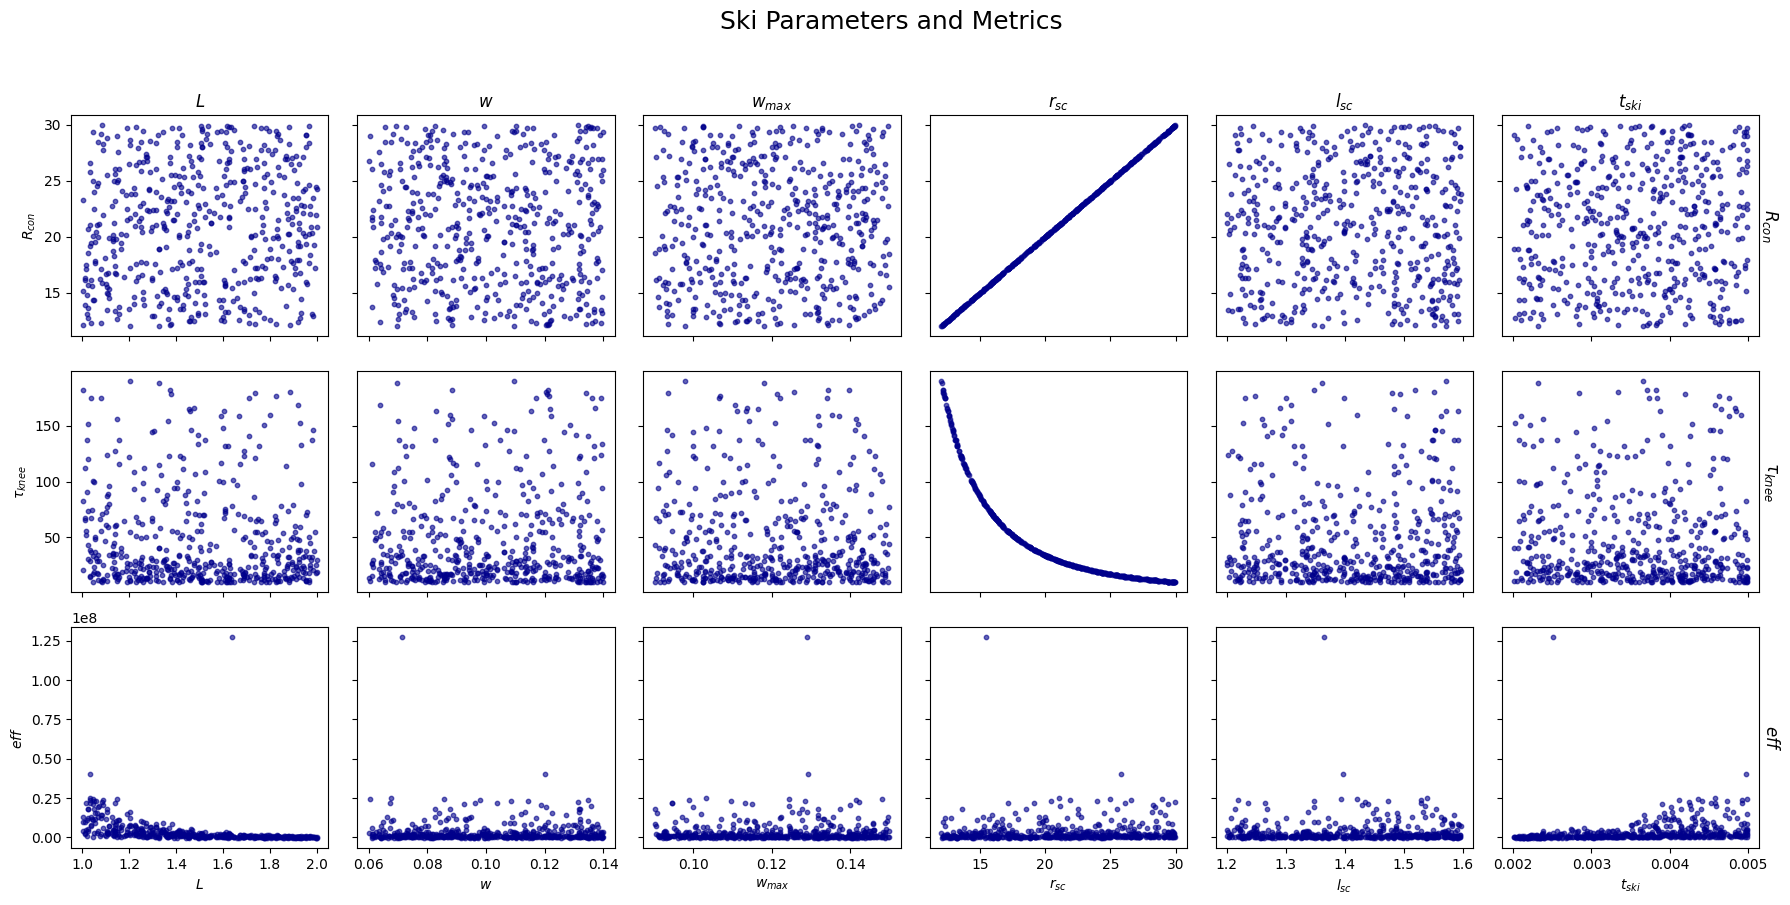

In [42]:
# ------ Code to make plots ------------

# L = 2.0 #m, length of ski
# w = 0.099 #m, waist width
# w_max = .125 #m, max width
# r_sc = 17.3 #m, sidecut radius
# l_sc = 1.31 #length of sidecut
# t_ski = .005 #thickness of ski
# np.random.seed(42)

Lbounds = [1,2]
wbounds = [0.06,0.14]
wmaxbounds = [.09,0.15]
r_scbounds = [12,30]
l_scbounds = [1.2,1.6]
t_skibounds = [0.002,0.005]

# print(np.random.uniform(Lbounds))

def gen_random_skis(N_samples):
    # generating random skis, and calculates metrics R_con, tau_knee, eff for all of them. 
    # returns np.array of size (N_samples, 9) where first 6 rows are the ski params, last 3 are the metrics

    N_samples = 500
    random_skis = []
    for i in range(N_samples):
        skivec = [np.random.uniform(*Lbounds), np.random.uniform(*wbounds), np.random.uniform(*wmaxbounds),np.random.uniform(*r_scbounds),np.random.uniform(*l_scbounds),np.random.uniform(*t_skibounds)]
        random_skis.append(skivec)

    random_skis = np.array(random_skis)

    # print('randomly generated skis', random_skis)
    #calculating metrics for all of the random skis
    skimetrics = []

    for ski in random_skis:
        s,h, Fs, R_con, tau_knee, eff = ski_turn_iterative(ski, v_ski = 10)
        metr = [R_con,tau_knee,eff]

        skimetrics.append(metr)

    ski_metrics = np.array(skimetrics)

    skis_and_metrics = np.concatenate((random_skis,ski_metrics),axis=1)
    print(skis_and_metrics.shape)

    return skis_and_metrics

# format of each vector is [L,w,wmax,r_sc,l_sc,t_ski,R_con,tau_knee,eff]

skis_and_metrics = gen_random_skis(500)
# # def plot_relationships(skis_and_metrics):
# L = [ski[0] for ski in skis_and_metrics]
# w = [ski[1] for ski in skis_and_metrics]
# wmax = [ski[2] for ski in skis_and_metrics]
# r_sc = [ski[3] for ski in skis_and_metrics]
# l_sc =  [ski[4] for ski in skis_and_metrics]
# t_ski = [ski[5] for ski in skis_and_metrics]
# R_con = [ski[6] for ski in skis_and_metrics]
# tau_knee = [ski[7] for ski in skis_and_metrics]
# eff = [ski[8] for ski in skis_and_metrics]

# plt.title('Length and tau_knee')
# plt.xlabel('Ski length')
# plt.ylabel('Tau_knee')
# plt.scatter(L,tau_knee)
import numpy as np
import matplotlib.pyplot as plt

# --- DATA ASSUMPTION ---
# The (500, 9) array 'skis_and_metrics' is assumed to be defined here.
# (Assuming your array is already loaded or defined elsewhere in your environment)
# -------------------------


# Define the column names
param_names = [r'$L$', r'$w$', r'$w_{max}$', r'$r_{sc}$', r'$l_{sc}$', r'$t_{ski}$']
metric_names = [r'$R_{con}$', r'$\tau_{knee}$', r'$eff$']

N_metrics = len(metric_names)   # 3 rows (for Y-axis metrics)
N_params = len(param_names)     # 6 columns (for X-axis parameters)

# --- 1. CREATE SUBPLOTS ---
# Create a figure with 3 rows (Metrics) and 6 columns (Parameters)
fig, axes = plt.subplots(N_metrics, N_params, figsize=(18, 9), sharex='col', sharey='row')
fig.suptitle('Ski Parameters and Metrics ', fontsize=18, y=1.03)

# --- 2. GENERATE PLOTS IN A NESTED LOOP ---
# row_idx: Metric index (0 to 2) -> defines the Y-axis data
# col_idx: Parameter index (0 to 5) -> defines the X-axis data

for row_idx in range(N_metrics):
    for col_idx in range(N_params):
        
        # Metric index in the (500, 9) array starts at 6
        m_idx_data = 6 + row_idx  # Used for Y-Axis data (Metric)
        p_idx_data = col_idx      # Used for X-Axis data (Parameter)
        
        # Select the correct Axes object: axes[row, column]
        ax = axes[row_idx, col_idx]
        
        # X-Axis Data: Parameter (columns 0-5)
        X_data = skis_and_metrics[:, p_idx_data] 
        # Y-Axis Data: Metric (columns 6-8)
        Y_data = skis_and_metrics[:, m_idx_data] 
        
        # Create the Scatter Plot
        ax.scatter(X_data, Y_data, s=10, alpha=0.6, color='darkblue')
        
        # --- Labeling Logic ---
        
        # X-Axis Labels (Parameter name): Only set for the bottom row (row_idx == N_metrics - 1)
        if row_idx == N_metrics - 1:
            ax.set_xlabel(param_names[col_idx], fontsize=10) # Use the Parameter name for X-label
        
        # Y-Axis Labels (Metric name): Only set for the first column (col_idx == 0)
        if col_idx == 0:
            ax.set_ylabel(metric_names[row_idx], fontsize=10) # Use the Metric name for Y-label
        
        # Column Titles: Add Parameter name as a title (for the top row)
        if row_idx == 0:
            ax.set_title(param_names[col_idx], fontsize=12)

        # Row Labels: Add Metric name as a label on the right side of the figure
        if col_idx == N_params - 1:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(metric_names[row_idx], rotation=270, labelpad=15, fontsize=12)


# --- 3. FINAL LAYOUT ADJUSTMENTS ---
# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 1.00]) 



In [34]:
# Trying to implement bayesian optimization

import numpy as np
import pandas as pd
# Assuming necessary libraries for Ax/BoTorch are installed:
# pip install ax-platform torch

from ax.service.ax_client import AxClient
from ax.core.types import Comparison
from ax.modelbridge.generation_strategy import GenerationStrategy, GenerationStep
from ax.models.torch.botorch_defaults import get_and_register_botorch_model
import torch

# --- 0. Setup and Helper Function ---

# Define parameter bounds based on your initial context
Lbounds = [1.0, 2.0]        # L (Length)
wbounds = [0.06, 0.14]      # w (Waist Width)
wmaxbounds = [0.09, 0.15]   # w_max (Max Width)
r_scbounds = [8.0, 30.0]    # r_sc (Sidecut Radius)
l_scbounds = [1.2, 1.6]     # l_sc (Sidecut Length)
t_skibounds = [0.002, 0.01] # t_ski (Thickness)


# Assume your function is available and takes a dictionary of parameters
def evaluate_ski_config(parameters):
    """
    Wrapper function to call your ski_turn_iterative.
    
    NOTE: This requires your original function to be defined elsewhere 
    and returns R_con and tau_knee in a consistent order.
    """
    
    # Unpack parameters in the correct order for your existing function
    ski_vec = [
        parameters["L"], parameters["w"], parameters["w_max"], 
        parameters["r_sc"], parameters["l_sc"], parameters["t_ski"]
    ]
    
    # ASSUME ski_turn_iterative returns: s, h, Fs, R_con, tau_knee, eff
    # We only care about R_con (index 3) and tau_knee (index 4)
    # R_con is R_con_val, tau_knee is tau_knee_val
    try:
        results = ski_turn_iterative(ski_vec, v_ski=10)
        R_con_val = results[3]
        tau_knee_val = results[4]
    except Exception as e:
        print(f"Ski evaluation failed: {e}. Returning penalized values.")
        # Return penalized values if simulation fails to guide optimization away
        R_con_val = -1e6 # Minimize R_con
        tau_knee_val = 1e6 # Maximize tau_knee (we want to MINIMIZE tau_knee)
        
    # Ax requires the objective metrics and standard errors (assuming zero error for simulation)
    return {
        "R_con": (R_con_val, 0.0), # R_con value and standard error
        "tau_knee": (tau_knee_val, 0.0) # tau_knee value and standard error
    }

# --- 1. Initialize AxClient ---

ax_client = AxClient(enforce_sequential_optimization=False)

# --- 2. Define Experiment and Search Space ---

# Define the experiment name and the six parameters
ax_client.create_experiment(
    name="Multi_Objective_Ski_Design",
    parameters=[
        {"name": "L", "type": "range", "bounds": Lbounds, "value_type": "float"},
        {"name": "w", "type": "range", "bounds": wbounds, "value_type": "float"},
        {"name": "w_max", "type": "range", "bounds": wmaxbounds, "value_type": "float"},
        {"name": "r_sc", "type": "range", "bounds": r_scbounds, "value_type": "float"},
        {"name": "l_sc", "type": "range", "bounds": l_scbounds, "value_type": "float"},
        {"name": "t_ski", "type": "range", "bounds": t_skibounds, "value_type": "float"},
    ],
    # Define the two objectives and their maximization/minimization goals
    objectives={
        "R_con": Comparison.GEQ,  # R_con should be greater than or equal (MAXIMIZE)
        "tau_knee": Comparison.LEQ, # tau_knee should be less than or equal (MINIMIZE)
    },
)

# --- 3. Run Optimization Loop ---

# Number of iterations to run the Bayesian Optimization
N_ITERATIONS = 50

print(f"Starting Multi-Objective Bayesian Optimization for {N_ITERATIONS} trials...")

for i in range(N_ITERATIONS):
    # 1. Generate next trial parameters based on current model (using Pareto front)
    parameters, trial_index = ax_client.get_next_trial()
    
    # 2. Evaluate the suggested trial
    results = evaluate_ski_config(parameters)
    
    # 3. Complete the trial with the results
    ax_client.complete_trial(trial_index=trial_index, raw_data=results)
    
    if (i + 1) % 10 == 0:
        print(f"Completed trial {i + 1}/{N_ITERATIONS}.")

# --- 4. Analyze Results ---

# Get the Pareto front (the set of optimal, non-dominated trade-offs)
pareto_frontier = ax_client.get_pareto_front(
    # Use the objectives defined in the experiment
)

# Extract the design variables (the ski parameters) for the Pareto optimal points
pareto_designs = pareto_frontier.arms_by_name

print("\n--- Optimization Complete ---")
print(f"Found {len(pareto_designs)} Pareto optimal ski designs (non-dominated trade-offs):")

# Print the parameters and corresponding metrics for the Pareto designs
for arm_name, arm in pareto_designs.items():
    metrics = ax_client.get_trial(arm.trial_index).lookup_data().df.loc[arm_name]
    
    # Extract metrics for the current arm (design)
    R_con_val = metrics.loc["R_con", "mean"]
    tau_knee_val = metrics.loc["tau_knee", "mean"]
    
    print(f"\nDesign ID: {arm_name}")
    print(f"  R_con: {R_con_val:.3f}")
    print(f"  Tau_knee: {tau_knee_val:.3f}")
    
    # Optional: Retrieve the parameter values from the trial
    trial = ax_client.get_trial(arm.trial_index)
    params_dict = trial.arm_dict[arm_name].parameters
    print(f"  Parameters: {params_dict}")

# Optional: You can visualize the Pareto front using Ax's plotting tools
# if you install the necessary plotting dependencies.
# from ax.plot.contour import plot_contour
# from ax.utils.notebook.plotting import render
# render(ax_client.get_pareto_front_plot())

OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "c:\Users\Anita Dey Barsukova\MIT Dropbox\Anita Barsukova\MIT Graduate School\2.156\environments\skienv\Lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [ ]:
#Trying to implement optimization - NSGA-II Old attempt

# pymoo imports
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.optimize import minimize
from pymoo.termination import get_termination

from pymoo.core.callback import Callback
from tqdm import tqdm

class ProgressBarCallback(Callback):
    def __init__(self, total_generations):
        super().__init__()
        self.total_generations = total_generations
        self.pbar = tqdm(total=total_generations, desc="NSGA-II Progress")

    def notify(self, algorithm):
        self.pbar.update(1)

    def finalize(self):
        self.pbar.close()

# L = 2.0 #m, length of ski
# w = 0.099 #m, waist width
# w_max = .125 #m, max width
# r_sc = 17.3 #m, sidecut radius
# l_sc = 1.31 #length of sidecut
#t_ski = .005 #thickness of ski
# --- Define the multi-objective problem ---
class SkiTurnProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(
            n_var=5,                # number of input parameters
            n_obj=2,                # eff and sens
            n_constr=2,             # no constraints for now
            xl=np.array([1,0.06,.09,8,1.2,0.002]),  # lower bounds for [L, w, w_max, r_sc, l_sc,t_ski]
            xu=np.array([2,0.14,0.15,30,1.6,0.01])   # upper bounds for each parameter (adjust!)
        )

    def _evaluate(self, x, out, *args, **kwargs):
        # Call your ski_turn_iterative function
        s,h, Fs, R_con, tau_knee, eff = ski_turn_iterative(x)
        
        # Set objectives
        out["F"] = np.array([eff, tau_knee], dtype=float)
        
        # Set constraints (must be <= 0)
        # x = [L, w, w_max, r_sc, l_sc]
        L, w, w_max, r_sc, l_sc, t_ski = x
        g1 = w - w_max          # w <= w_max
        g2 = l_sc - L   # l_sc <= L
        out["G"] = np.array([g1, g2], dtype=float)

# --- Set up NSGA-II algorithm ---
algorithm = NSGA2(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PolynomialMutation(prob=0.2, eta=20)
)

gens = 20
# --- Termination criterion ---
# from pymoo.factory import get_termination
termination = get_termination("n_gen", gens)

#making a progress bar
# progress_cb = ProgressBarCallback(total_generations=gens)

import sys
import os

# Suppress prints
old_stdout = sys.stdout
sys.stdout = open(os.devnull, "w")

# --- Run optimization ---
results = minimize(
    SkiTurnProblem(),
    algorithm,
    termination,
    seed=1,
    verbose=False,
    callback=ProgressBarCallback(total_generations=gens)
)

# Restore prints
sys.stdout.close()
sys.stdout = old_stdout

# --- Inspect results ---
print("Pareto-optimal decision variables")
print(results.X)
print("Corresponding objective values [eff, sens]:")
print(results.F)



ValueError: operands could not be broadcast together with shapes (6,) (50,5) 

-0.9999999999800946


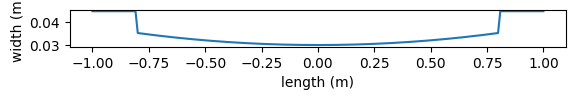

In [ ]:
#visualize the optimized ski 
L, w, w_max, r_sc, l_sc = results.X[0]
s_vis = np.linspace(-L/2, L/2, 200)
print(s_vis[0])
widths = get_widths(s_vis, L, w, w_max, r_sc, l_sc)
plot_ski(s_vis,widths)

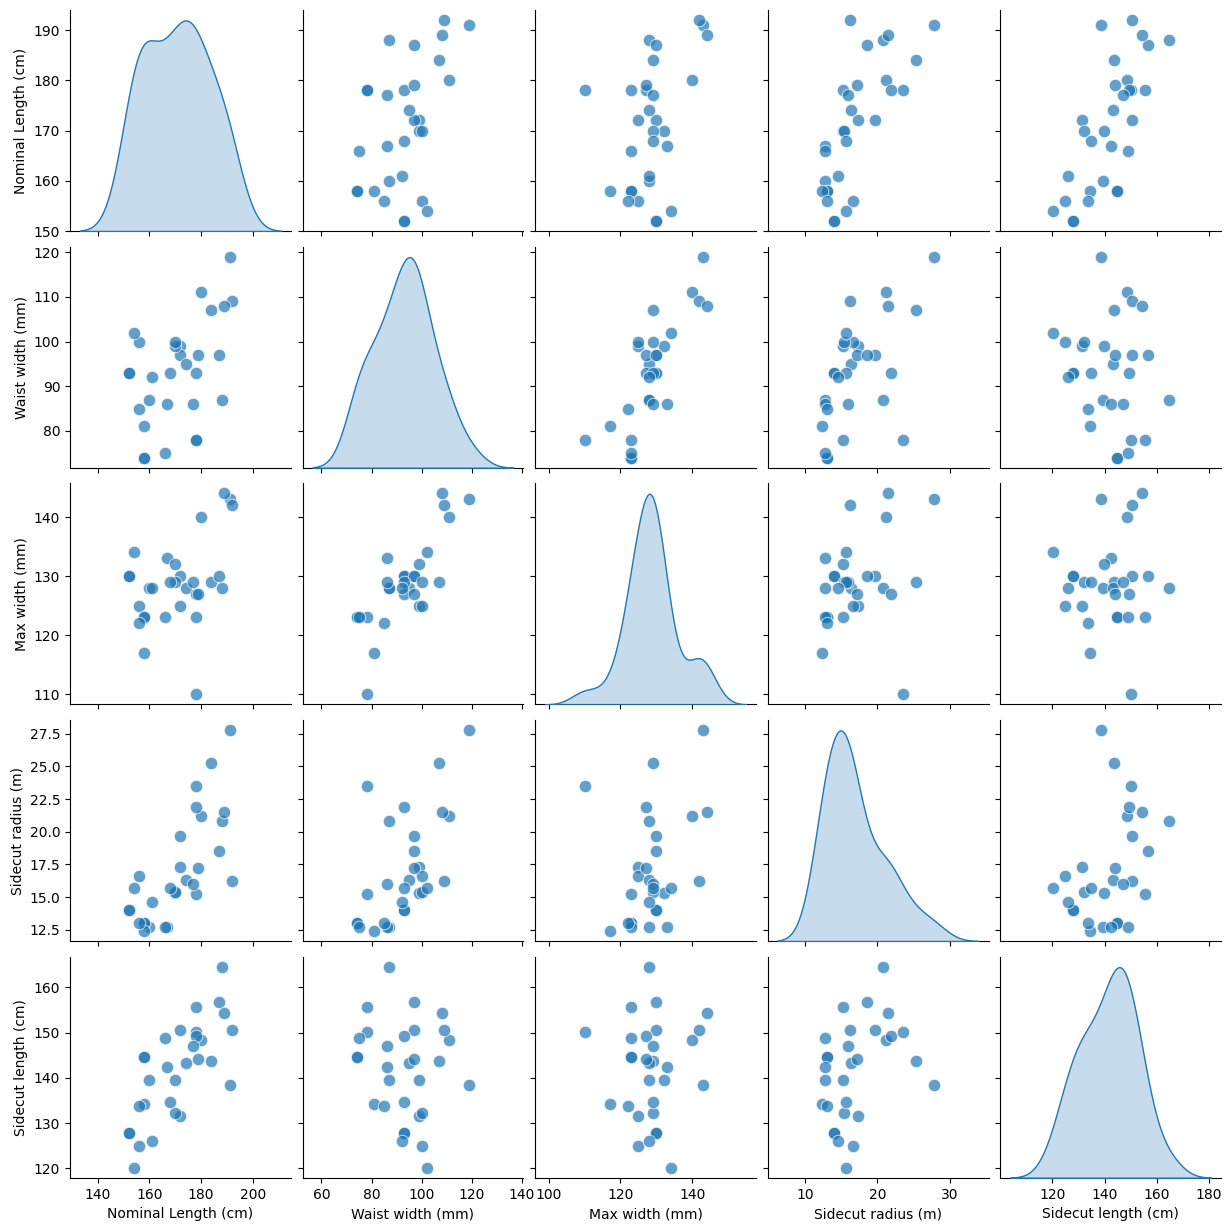

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
file_path = "SoothSkiSkiData.xlsx"
df = pd.read_excel(file_path)
df = df.T

Lstring = "191	172	184	188	152	172	156	160	152	158	178	180	174	158	178	167	179	178	170	158	192	187	166	170	177	154	189	168	161	156"
wstring = "119	99	107	87	93	97	100	87	93	74	78	111	95	74	93	86	97	78	99	81	109	97	75	100	86	102	108	93	92	85"
wmaxstring = "143	125	129	128	130	130	125	128	130	123	110	140	128	123	127	133	127	123	132	117	142	130	123	129	129	134	144	129	128	122"
rscstring = "27.8 17.3	25.3	20.8	14	19.7	16.6	12.7	14	13	23.5	21.2	16.3	13	21.9	12.7	17.2	15.2	15.3	12.4	16.2	18.5	12.7	15.4	16	15.7	21.5	15.7	14.6	13"
lscstring = "138.5	131.5	143.6	164.6	127.8	150.5	125	139.4	127.8	144.6	150.2	148.4	143.3	144.6	149.3	142.3	144.1	155.6	139.6	134.3	150.5	156.8	148.9	132.1	147.1	120.1	154.3	134.6	126	133.8"

SS_L = [float(x) for x in Lstring.split()]
SS_w = [float(x) for x in wstring.split()]
SS_w_max = [float(x) for x in wmaxstring.split()]
SS_r_sc = [float(x) for x in rscstring.split()]
SS_L_sc = [float(x) for x in lscstring.split()]

data = {
    "Nominal Length (cm)": SS_L,
    "Waist width (mm)": SS_w,
    "Max width (mm)": SS_w_max,
    "Sidecut radius (m)": SS_r_sc,
    "Sidecut length (cm)": SS_L_sc,
}

df = pd.DataFrame(data)

sns.pairplot(df, diag_kind="kde", plot_kws={'alpha':0.7, 's':80})
# plt.title("True Skis on the Market from SoothSki Website")
plt.xlabel("X Axis Label", fontsize=18)
plt.ylabel("Y Axis Label", fontsize=18)
plt.show()


In [ ]:
#code that overlays the plots for real skis vs random "generated" skis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def importData():
    file_path = "Sooth_ski_data_transpose.xlsx"
    df = pd.read_excel(file_path)
    df = df

    #print(df.columns)

    #get the relevant data
    data_Strings = ['Nominal Length (cm)', 'Waist Width (mm)', 'Tip Width (mm)', 'Sidecut Radius (m)', 'Sidecut Length (cm)']
    scale_factors = [100, 1000, 1000, 1, 100,1] #to get to m

    #print(data_Strings)
    #print(df[data_Strings])
    #print(df[data_Strings[4]].str.extract(r'([\d\.]+)'))
    df[data_Strings[4]] = df[data_Strings[4]].astype(str).str.extract(r'([\d\.]+)').astype(float)

    #print(df[data_Strings])


    #now calculate the approximate thickness
    EI = df['Average Bending Stiffness - EI (Nm²)']
    w = df['Tip Width (mm)']

    t = (EI/w/1000*12)**(1/3)/100 #m

    

    df['Thickness (m)'] = t

    data_Strings.append('Thickness (m)')

    #scale the data into an array
    datasubset = df[data_Strings]

    for i in range(0,len(data_Strings)):
        # print(scale_factors[i])
        # print(data_Strings[i])
        # print(datasubset[data_Strings[i]])
        datasubset[data_Strings[i]] = datasubset[data_Strings[i]]/scale_factors[i]
    
    numpy_data = datasubset.to_numpy()

    #print(datasubset)
    return numpy_data
    # print(data_Strings)
    # print(df[data_Strings[-1]])

data = importData()
# print(data)


#

[[1.91000000e+00 1.19000000e-01 1.43000000e-01 2.78000000e+01
  1.38500000e+00 2.88449914e-03]
 [1.72000000e+00 9.90000000e-02 1.25000000e-01 1.73000000e+01
  1.31500000e+00 2.57571068e-03]
 [1.84000000e+00 1.07000000e-01 1.29000000e-01 2.53000000e+01
  1.43600000e+00 2.81969971e-03]
 [1.88000000e+00 8.70000000e-02 1.28000000e-01 2.08000000e+01
  1.64600000e+00 2.88073838e-03]
 [1.52000000e+00 9.30000000e-02 1.30000000e-01 1.40000000e+01
  1.27800000e+00 2.35226187e-03]
 [1.72000000e+00 9.70000000e-02 1.30000000e-01 1.97000000e+01
  1.50500000e+00 2.46368003e-03]
 [1.56000000e+00 1.00000000e-01 1.25000000e-01 1.66000000e+01
  1.25000000e+00 2.38883705e-03]
 [1.60000000e+00 8.70000000e-02 1.28000000e-01 1.27000000e+01
  1.39400000e+00 2.25308220e-03]
 [1.52000000e+00 9.30000000e-02 1.30000000e-01 1.40000000e+01
  1.27800000e+00 2.35226187e-03]
 [1.58000000e+00 7.40000000e-02 1.23000000e-01 1.30000000e+01
  1.44600000e+00 2.49918673e-03]
 [1.78000000e+00 7.80000000e-02 1.10000000e-01 2.3

C:\Users\laSch\AppData\Local\Temp\ipykernel_43548\751348641.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasubset[data_Strings[i]] = datasubset[data_Strings[i]]/scale_factors[i]


C:\Users\laSch\AppData\Local\Temp\ipykernel_43548\751348641.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasubset[data_Strings[i]] = datasubset[data_Strings[i]]/scale_factors[i]
c:\Users\laSch\Desktop\Fall 2025\2.156\Final Project\Code\Ski-Optimization\Ski_Optimization_Simplified.py:166: RuntimeWarning: invalid value encountered in log10
  Efficiency = np.log10(-1/(F_f2/Fg))


408.1577746560083
100.0
304.26187895628027
100.0
536.8583863014868
100.0
735.3477583356957
100.0
341.61223367739296
100.0
310.50039444664617
100.0
429.90293291482305
100.0
686.8293854395397
100.0
458.80537721124176
100.0
560.6036897920841
100.0
400.9197583904131
100.0
771.0444552967921
100.0
489.5099698678348
100.0
336.55509562248506
100.0
381.12275773990234
100.0
352.26486076262
100.0
361.3634065487938
100.0
710.4470986706672
100.0
648.027391941396
100.0
620.2728310241877
100.0
329.22872065398496
100.0
529.6811158316656
100.0
304.9489353762053
100.0
334.0592154815853
100.0
728.5159677652423
100.0
354.66819502361915
100.0
301.7300531350194
100.0
368.3878050826462
100.0
748.6123130047802
100.0
462.78730185906966
100.0
727.3562158768975
100.0
371.76825606216016
100.0
341.8009387400345
100.0
320.4891667519628
100.0
788.2388621571267
100.0
647.3082930064018
100.0
455.13439383031323
100.0
351.8786687312728
100.0
303.3759313065281
100.0
564.1807613566117
100.0
796.5840179841292
100.0
608.574

c:\Users\laSch\Desktop\Fall 2025\2.156\Final Project\Code\Ski-Optimization\Ski_Optimization_Simplified.py:129: RuntimeWarning: invalid value encountered in arcsin
  phi = np.arcsin(v_ski**2/g/r_sc)


441.20061750507625
100.0
629.1984390553077
100.0
678.8133598863187
100.0
757.6954128439738
100.0
(140, 9)


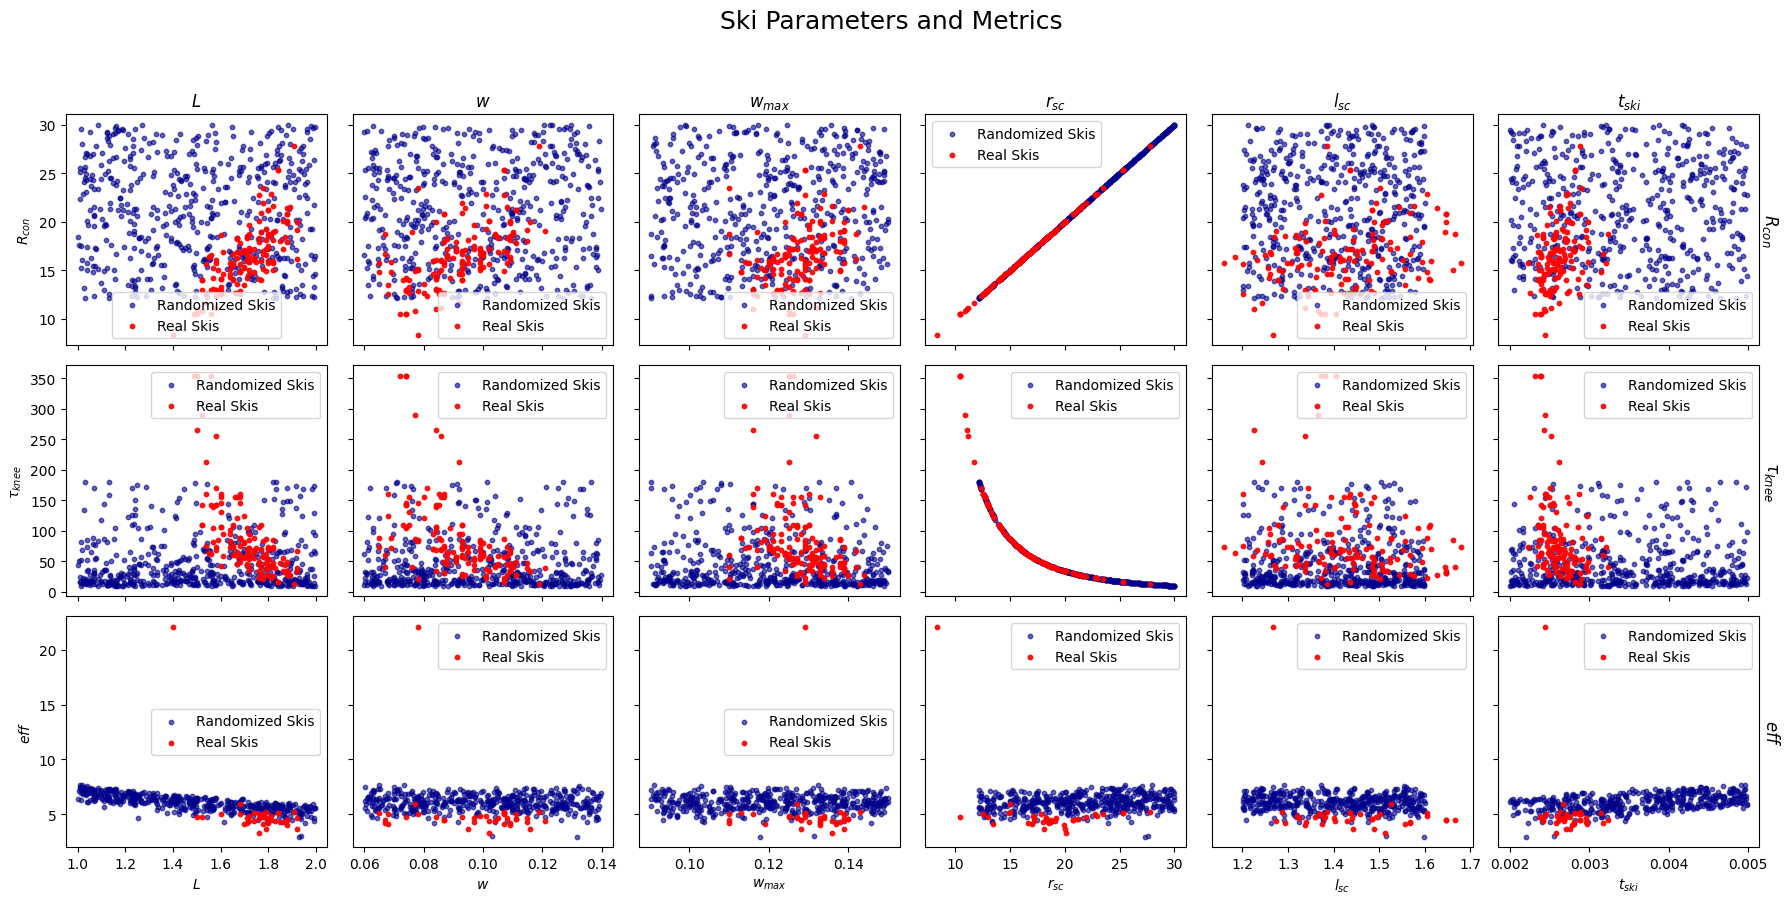

In [98]:
# ------ Code to make plots ------------

# L = 2.0 #m, length of ski
# w = 0.099 #m, waist width
# w_max = .125 #m, max width
# r_sc = 17.3 #m, sidecut radius
# l_sc = 1.31 #length of sidecut
# t_ski = .005 #thickness of ski
# np.random.seed(42)

Lbounds = [1,2]
wbounds = [0.06,0.14]
wmaxbounds = [.09,0.15]
r_scbounds = [12,30]
l_scbounds = [1.2,1.6]
t_skibounds = [0.002,0.005]

# print(np.random.uniform(Lbounds))

def gen_random_skis(N_samples):
    # generating random skis, and calculates metrics R_con, tau_knee, eff for all of them. 
    # returns np.array of size (N_samples, 9) where first 6 rows are the ski params, last 3 are the metrics

    N_samples = 500
    random_skis = []
    for i in range(N_samples):
        skivec = [np.random.uniform(*Lbounds), np.random.uniform(*wbounds), np.random.uniform(*wmaxbounds),np.random.uniform(*r_scbounds),np.random.uniform(*l_scbounds),np.random.uniform(*t_skibounds)]
        random_skis.append(skivec)

    random_skis = np.array(random_skis)

    # print('randomly generated skis', random_skis)
    #calculating metrics for all of the random skis
    skimetrics = []

    for ski in random_skis:
        s,h, Fs, R_con, tau_knee, eff = ski_turn_iterative(ski, v_ski = 10)
        metr = [R_con,tau_knee,eff]

        skimetrics.append(metr)

    ski_metrics = np.array(skimetrics)

    skis_and_metrics = np.concatenate((random_skis,ski_metrics),axis=1)
    print(skis_and_metrics.shape)

    return skis_and_metrics

def gen_data_skis(data):

    random_skis = data
    # print('randomly generated skis', random_skis)
    #calculating metrics for all of the random skis
    skimetrics = []

    for ski in random_skis:
        s,h, Fs, R_con, tau_knee, eff = ski_turn_iterative(ski, v_ski = 10)
        metr = [R_con,tau_knee,eff]

        skimetrics.append(metr)

    ski_metrics = np.array(skimetrics)

    skis_and_metrics = np.concatenate((random_skis,ski_metrics),axis=1)
    print(skis_and_metrics.shape)

    return skis_and_metrics


# format of each vector is [L,w,wmax,r_sc,l_sc,t_ski,R_con,tau_knee,eff]
data = importData()
skis_and_metrics = gen_random_skis(500)
skis_and_metrics_real = gen_data_skis(data)
# # def plot_relationships(skis_and_metrics):
# L = [ski[0] for ski in skis_and_metrics]
# w = [ski[1] for ski in skis_and_metrics]
# wmax = [ski[2] for ski in skis_and_metrics]
# r_sc = [ski[3] for ski in skis_and_metrics]
# l_sc =  [ski[4] for ski in skis_and_metrics]
# t_ski = [ski[5] for ski in skis_and_metrics]
# R_con = [ski[6] for ski in skis_and_metrics]
# tau_knee = [ski[7] for ski in skis_and_metrics]
# eff = [ski[8] for ski in skis_and_metrics]

# plt.title('Length and tau_knee')
# plt.xlabel('Ski length')
# plt.ylabel('Tau_knee')
# plt.scatter(L,tau_knee)
#import numpy as np
import matplotlib.pyplot as plt

# --- DATA ASSUMPTION ---
# The (500, 9) array 'skis_and_metrics' is assumed to be defined here.
# (Assuming your array is already loaded or defined elsewhere in your environment)
# -------------------------


# Define the column names
param_names = [r'$L$', r'$w$', r'$w_{max}$', r'$r_{sc}$', r'$l_{sc}$', r'$t_{ski}$']
metric_names = [r'$R_{con}$', r'$\tau_{knee}$', r'$eff$']

N_metrics = len(metric_names)   # 3 rows (for Y-axis metrics)
N_params = len(param_names)     # 6 columns (for X-axis parameters)

# --- 1. CREATE SUBPLOTS ---
# Create a figure with 3 rows (Metrics) and 6 columns (Parameters)
fig, axes = plt.subplots(N_metrics, N_params, figsize=(18, 9), sharex='col', sharey='row')
fig.suptitle('Ski Parameters and Metrics ', fontsize=18, y=1.03)

# --- 2. GENERATE PLOTS IN A NESTED LOOP ---
# row_idx: Metric index (0 to 2) -> defines the Y-axis data
# col_idx: Parameter index (0 to 5) -> defines the X-axis data

for row_idx in range(N_metrics):
    for col_idx in range(N_params):
        
        # Metric index in the (500, 9) array starts at 6
        m_idx_data = 6 + row_idx  # Used for Y-Axis data (Metric)
        p_idx_data = col_idx      # Used for X-Axis data (Parameter)
        
        # Select the correct Axes object: axes[row, column]
        ax = axes[row_idx, col_idx]
        
        # X-Axis Data: Parameter (columns 0-5)
        X_data = skis_and_metrics[:, p_idx_data] 
        # Y-Axis Data: Metric (columns 6-8)
        Y_data = skis_and_metrics[:, m_idx_data] 
        
        # Create the Scatter Plot
        ax.scatter(X_data, Y_data, s=10, alpha=0.6, color='darkblue')

        #now overlay the real data too
        X_real = skis_and_metrics_real[:,p_idx_data]
        Y_real = skis_and_metrics_real[:, m_idx_data]
        ax.scatter(X_real, Y_real, s=10, alpha=0.9, color='red')
        ax.legend(['Randomized Skis', 'Real Skis'])
        
        # --- Labeling Logic ---
        
        # X-Axis Labels (Parameter name): Only set for the bottom row (row_idx == N_metrics - 1)
        if row_idx == N_metrics - 1:
            ax.set_xlabel(param_names[col_idx], fontsize=10) # Use the Parameter name for X-label
        
        # Y-Axis Labels (Metric name): Only set for the first column (col_idx == 0)
        if col_idx == 0:
            ax.set_ylabel(metric_names[row_idx], fontsize=10) # Use the Metric name for Y-label
        
        # Column Titles: Add Parameter name as a title (for the top row)
        if row_idx == 0:
            ax.set_title(param_names[col_idx], fontsize=12)

        # Row Labels: Add Metric name as a label on the right side of the figure
        if col_idx == N_params - 1:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(metric_names[row_idx], rotation=270, labelpad=15, fontsize=12)


# --- 3. FINAL LAYOUT ADJUSTMENTS ---
# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 1.00]) 



In [103]:
print(min(data[:,3]))

8.4
